In [3]:
#importing libraries required for the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use("ggplot")
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stopwords= set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [4]:
#Reading the data and finding the first 5 rows of data
df= pd.read_csv('IMDB Dataset.csv')
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [5]:
#Understanding the shape of the data
df.shape


(50000, 2)

In [6]:
# finding the shape of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [7]:
#Plotting the distribution of sentiments in the dataset
sns.countplot(x='sentiment',data=df)
plt.title("Movie sentiment distribution")

Text(0.5, 1.0, 'Movie sentiment distribution')

In [8]:
#Displaying the first five rows
for i in range(5):
    print("Review: ", [i])
    print(df['review'].iloc[i],"\n")
    print("Sentiment: ", df["sentiment"].iloc[i],"\n\n")

Review:  [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is d

In [9]:
#Defining a function to get the word count
def word_count(text):
    text= text.split()
    word_count= len(text)
    return word_count

In [10]:
#Finding the word count of the reviews
df["word_count"]= df['review'].apply(word_count) 
df.head()

review sentiment  word_count
0  One of the other reviewers has mentioned that ...  positive         307
1  A wonderful little production. <br /><br />The...  positive         162
2  I thought this was a wonderful way to spend ti...  positive         166
3  Basically there's a family where a little boy ...  negative         138
4  Petter Mattei's "Love in the Time of Money" is...  positive         230

In [11]:
#Printing the review with the maximum word count
pd.set_option('display.max_colwidth', None) #setting the maximum column width to see the entire review
print(df[df["word_count"]==max(df["word_count"])])

In [12]:
#Restoring the displaying option
pd.reset_option('^display.', silent=True)

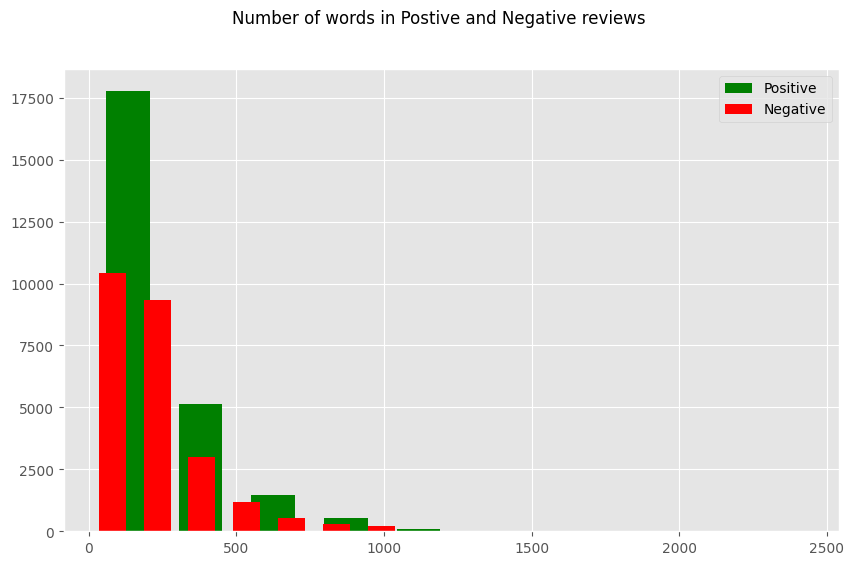

In [13]:
#Plotting the word distribution of Positive and Negative reviews
fig,axis= plt.subplots(figsize=(10,6))
axis.hist(df[df['sentiment']=='positive']['word_count'], label='Positive', color='green', rwidth=0.6)
axis.legend(loc='upper right')
axis.hist(df[df['sentiment']=='negative']['word_count'], label='Negative', color='red', rwidth=0.6)
axis.legend(loc='upper right')
fig.suptitle("Number of words in Postive and Negative reviews")
plt.show()

In [14]:
#Replacing positive and negative sentiments with numerical values for processing
df['sentiment'].replace("positive",1,inplace=True)
df['sentiment'].replace("negative",0,inplace=True)

In [15]:
df.head()

review  sentiment  word_count
0  One of the other reviewers has mentioned that ...          1         307
1  A wonderful little production. <br /><br />The...          1         162
2  I thought this was a wonderful way to spend ti...          1         166
3  Basically there's a family where a little boy ...          0         138
4  Petter Mattei's "Love in the Time of Money" is...          1         230

# Data Processing

In [16]:
#Cleaning the data from mentions, punctuations, urls and tokenising the text to remove stopwords
def text_process(text):
    text= text.lower()
    text= re.sub('<br />','', text)
    text= re.sub(r'https\S+|www\S+|http\S+','',text, flags= re.MULTILINE)
    text=re.sub(r'\@w+|\#','',text)
    text=re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filter_text= [w for w in text_tokens if not w in stopwords]
    return(" ".join(filter_text))

In [17]:
# Applying the function on the dataframe
df.review = df['review'].apply(text_process)
df

review  sentiment  \
0      one reviewers mentioned watching 1 oz episode ...          1   
1      wonderful little production filming technique ...          1   
2      thought wonderful way spend time hot summer we...          1   
3      basically theres family little boy jake thinks...          0   
4      petter matteis love time money visually stunni...          1   
...                                                  ...        ...   
49995  thought movie right good job wasnt creative or...          1   
49996  bad plot bad dialogue bad acting idiotic direc...          0   
49997  catholic taught parochial elementary schools n...          0   
49998  im going disagree previous comment side maltin...          0   
49999  one expects star trek movies high art fans exp...          0   

       word_count  
0             307  
1             162  
2             166  
3             138  
4             230  
...           ...  
49995         194  
49996         112  
49997         230  
49998         212  
49999         129  

[50000 rows x 3 columns]

In [18]:
#Finding the duplicates in the data
count_dupli = df.duplicated().sum()
print("The number of duplicates are:", count_dupli)

The number of duplicates are: 421


In [19]:
#Removing the duplicates
df=df.drop_duplicates('review')

In [20]:
#Defining stemming operation to change various forms of the same word
ps= PorterStemmer()
def stem(data):
    text = [ps.stem(word) for word in data.split()]
    #return " ".join(text)
    return data

In [21]:
#Applying stemming operation to the dataset
df.review = df['review'].apply(lambda x: stem(x))

C:\Users\Nikhil R Krishnan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [22]:
#Finding the first 5 rows of the dataset
df.head()

review  sentiment  word_count
0  one reviewers mentioned watching 1 oz episode ...          1         307
1  wonderful little production filming technique ...          1         162
2  thought wonderful way spend time hot summer we...          1         166
3  basically theres family little boy jake thinks...          0         138
4  petter matteis love time money visually stunni...          1         230

In [23]:
#Printing word cloud for postivie reviews
pos_review= df[df.sentiment==1]
pos_review.head()

review  sentiment  word_count
0  one reviewers mentioned watching 1 oz episode ...          1         307
1  wonderful little production filming technique ...          1         162
2  thought wonderful way spend time hot summer we...          1         166
4  petter matteis love time money visually stunni...          1         230
5  probably alltime favorite movie story selfless...          1         119

In [24]:
#Plotting the word cloud
text= ' '.join([word for word in pos_review['review']])
plt.figure(figsize=(20,15), facecolor= 'green')
wordcloud= WordCloud(max_words = 500, width = 1000, height= 800).generate(text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title(" The Frequent words in the positive review", fontsize= 20)
plt.show()

In [25]:
# The number of times the word is used in these reviews
from collections import Counter
c = Counter()
for t in pos_review['review'].values:
    for w in text.split():
        c[w] += 1
c.most_common(15)

KeyboardInterrupt: 

In [ ]:
pos_words = pd.DataFrame(c.most_common(15))
pos_words.columns = ['word','count']
pos_words.head()

In [ ]:
px.bar(pos_words, x='count', y='word', title= 'Common words in positive reviews',color= 'word')

In [26]:
#Printing word cloud for negative reviews
neg_review= df[df.sentiment==0]
neg_review.head()

review  sentiment  word_count
3   basically theres family little boy jake thinks...          0         138
7   show amazing fresh innovative idea 70s first a...          0         174
8   encouraged positive comments film looking forw...          0         130
10  phil alien one quirky films humour based aroun...          0          96
11  saw movie 12 came recall scariest scene big bi...          0         180

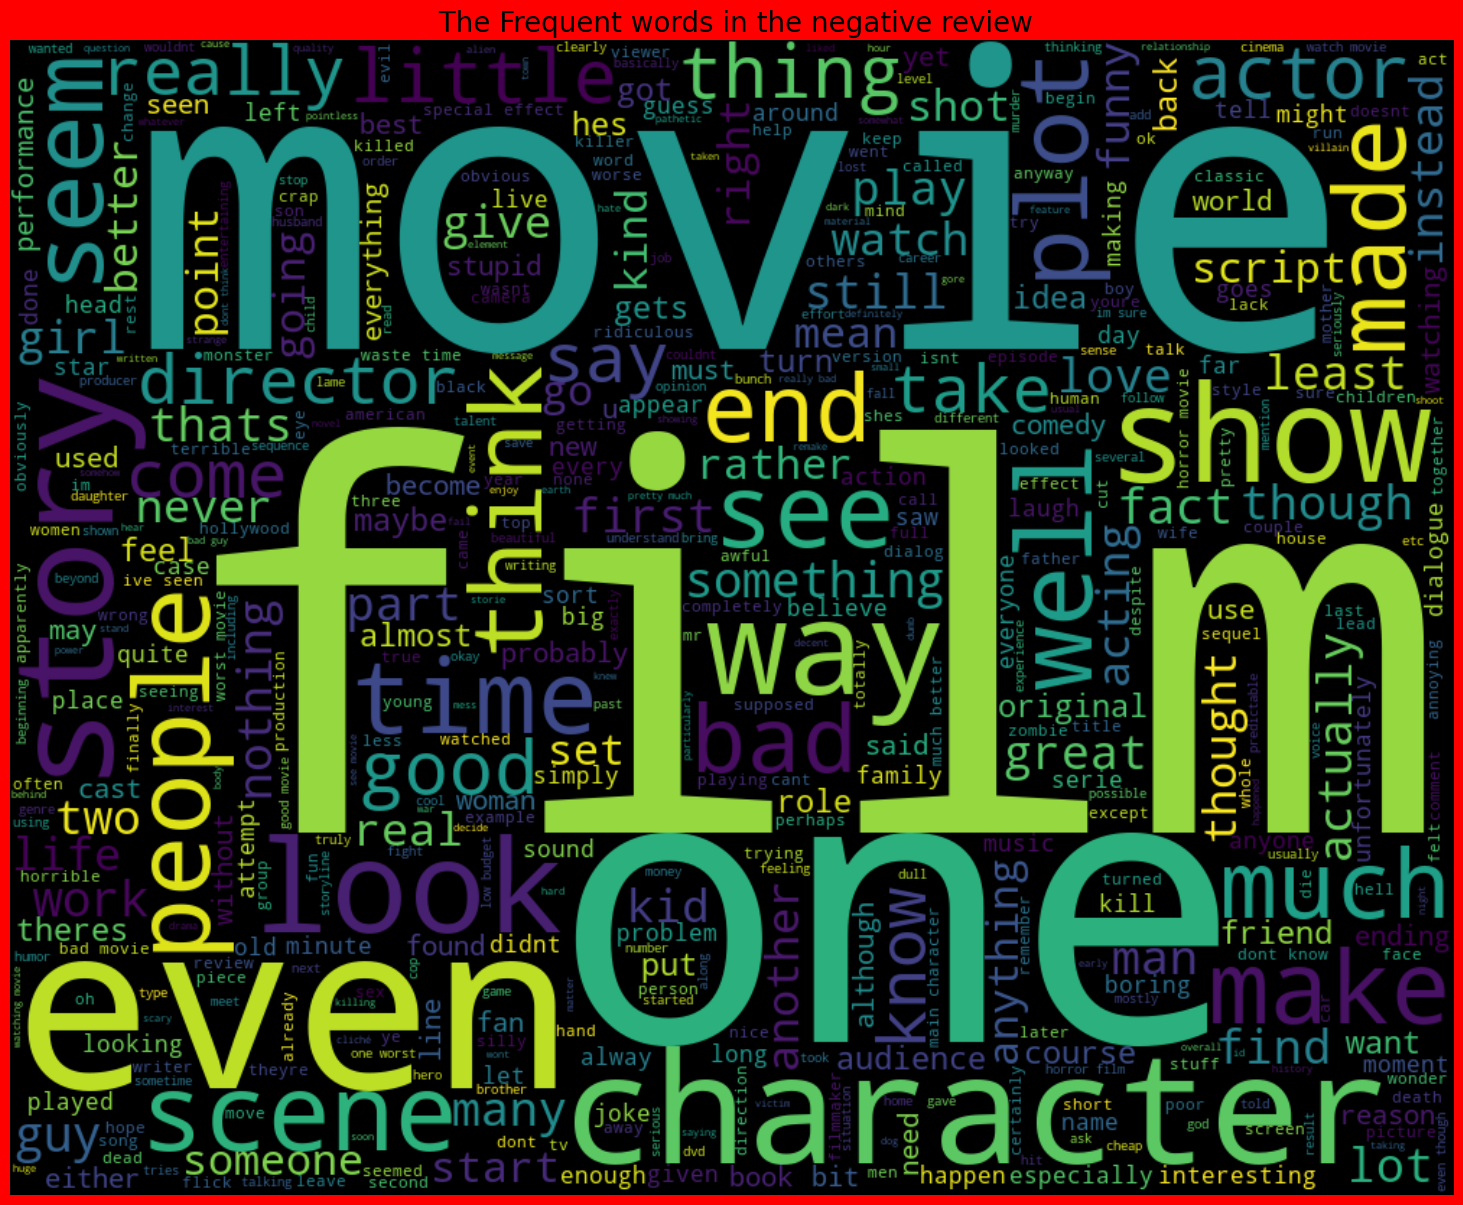

In [27]:
#Plotting the word cloud
text= ' '.join([word for word in neg_review['review']])
plt.figure(figsize=(20,15), facecolor= 'red')
wordcloud= WordCloud(max_words = 500, width = 1000, height= 800).generate(text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title(" The Frequent words in the negative review", fontsize= 20)
plt.show()

In [ ]:
# The number of times the word is used in these reviews
from collections import Counter
c = Counter()
for t in neg_review['review'].values:
    for w in text.split():
        c[w] += 1
c.most_common(15)

In [ ]:
neg_words = pd.DataFrame(c.most_common(15))
neg_words.columns = ['word','count']
neg_words.head()

In [ ]:
px.bar(neg_words, x='count', y='word', title= 'Common words in positive reviews',color= 'word')

In [34]:
X = df['review']
Y= df['sentiment']

In [35]:
vect = TfidfVectorizer()
X = vect.fit_transform(df['review'])

In [23]:
x_train,x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)

In [24]:
print("The shape of x_train: ",(x_train.shape))
print("The shape of y_train: ",(y_train.shape))
print("The shape of x_test: ",(x_test.shape))
print("The shape of y_test: ",(y_test.shape))

The shape of x_train:  (34704, 221707)
The shape of y_train:  (34704,)
The shape of x_test:  (14874, 221707)
The shape of y_test:  (14874,)


# Machine Learning model building

In [25]:
#importing Libraries to do the model building
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [26]:
logreg= LogisticRegression()
logreg.fit(x_train,y_train)
logreg_predict = logreg.predict(x_test)
logreg_accuracy = accuracy_score(logreg_predict, y_test)
print("Test accuracy: {:.2f}%".format(logreg_accuracy*100))

Test accuracy: 89.00%


In [27]:
print(confusion_matrix(y_test, logreg_predict))
print("\n")
print(classification_report(y_test,logreg_predict))

[[6453  908]
 [ 728 6785]]


              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7361
           1       0.88      0.90      0.89      7513

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



In [28]:
mnb= MultinomialNB()
mnb.fit(x_train,y_train)
mnb_predict = mnb.predict(x_test)
mnb_accuracy = accuracy_score(mnb_predict, y_test)
print("Test accuracy: {:.2f}%".format(mnb_accuracy*100))

Test accuracy: 86.44%


In [29]:
print(confusion_matrix(y_test, mnb_predict))
print("\n")
print(classification_report(y_test, mnb_predict))

[[6418  943]
 [1074 6439]]


              precision    recall  f1-score   support

           0       0.86      0.87      0.86      7361
           1       0.87      0.86      0.86      7513

    accuracy                           0.86     14874
   macro avg       0.86      0.86      0.86     14874
weighted avg       0.86      0.86      0.86     14874



In [30]:
svc= LinearSVC()
svc.fit(x_train,y_train)
svc_predict = svc.predict(x_test)
svc_accuracy = accuracy_score(svc_predict, y_test)
print("Test accuracy: {:.2f}%".format(svc_accuracy*100))

Test accuracy: 89.22%


In [31]:
print(confusion_matrix(y_test, svc_predict))
print("\n")
print(classification_report(y_test, svc_predict))

[[6504  857]
 [ 747 6766]]


              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7361
           1       0.89      0.90      0.89      7513

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



In [39]:
from sklearn.model_selection import GridSearchCV
para_grid = {'C':[0.1,1,10,100], 'loss':['hinge', 'squared_hinge']}
grid= GridSearchCV(svc, para_grid, refit = True, verbose = 3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .................C=0.1, loss=hinge;, score=0.872 total time=   0.1s
[CV 2/5] END .................C=0.1, loss=hinge;, score=0.875 total time=   0.1s
[CV 3/5] END .................C=0.1, loss=hinge;, score=0.871 total time=   0.2s
[CV 4/5] END .................C=0.1, loss=hinge;, score=0.878 total time=   0.1s
[CV 5/5] END .................C=0.1, loss=hinge;, score=0.874 total time=   0.3s
[CV 1/5] END .........C=0.1, loss=squared_hinge;, score=0.892 total time=   0.2s
[CV 2/5] END .........C=0.1, loss=squared_hinge;, score=0.895 total time=   0.3s
[CV 3/5] END .........C=0.1, loss=squared_hinge;, score=0.888 total time=   0.1s
[CV 4/5] END .........C=0.1, loss=squared_hinge;, score=0.894 total time=   0.3s
[CV 5/5] END .........C=0.1, loss=squared_hinge;, score=0.890 total time=   0.1s
[CV 1/5] END ...................C=1, loss=hinge;, score=0.896 total time=   0.5s
[CV 2/5] END ...................C=1, loss=hinge;,

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'loss': ['hinge', 'squared_hinge']},
             verbose=3)

In [32]:
print("best cross validation score:  {:.2f}".format(grid.best_score_))
print("best parameters: ", grid.best_params_)

NameError: name 'grid' is not defined

In [36]:
svc= LinearSVC(C = 1, loss = 'hinge')
svc.fit(x_train,y_train)
svc_predict = svc.predict(x_test)
svc_accuracy = accuracy_score(svc_predict, y_test)
print("Test accuracy: {:.2f}%".format(svc_accuracy*100))

Test accuracy: 89.41%


In [37]:
print(confusion_matrix(y_test, svc_predict))
print("\n")
print(classification_report(y_test, svc_predict))

[[6511  850]
 [ 725 6788]]


              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7361
           1       0.89      0.90      0.90      7513

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



# Importing Tweet to calculate the sentiments

In [39]:
#importing the csv file of tweet for movie reviews
df_tweet = pd.read_csv('movie_reviews_tweets.csv')

# Exploratory Analysis

In [40]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200004 entries, 0 to 200003
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  200004 non-null  int64 
 1   Datetime    200004 non-null  object
 2   Tweet Id    200004 non-null  int64 
 3   Text        200004 non-null  object
 4   Username    200004 non-null  object
 5   Location    3567 non-null    object
dtypes: int64(2), object(4)
memory usage: 9.2+ MB


In [41]:
# Finding first five rows of data
df_tweet.head()

Unnamed: 0                   Datetime             Tweet Id  \
0           0  2022-09-05 20:24:52+00:00  1566885092483547138   
1           1  2022-09-05 20:00:12+00:00  1566878885903536130   
2           2  2022-09-05 20:00:11+00:00  1566878884137783298   
3           3  2022-09-05 20:00:00+00:00  1566878837564121089   
4           4  2022-09-05 19:46:04+00:00  1566875330274627584   

                                                Text         Username Location  
0  Rewatched @MichaelJaiWhite at his best in "Blo...       dravencage      NaN  
1  Mark Hamill Is Still Bitter ‘Star Wars’ Sequel...       BoxReview_      NaN  
2  ‘The Mandalorian’ Star Teases Gideon’s Big Pla...       BoxReview_      NaN  
3  Hello Movie Lovers! (Announcement)\n\nTwo Witc...  bobsmoviereview      NaN  
4  New episode featuring @letstalkhorrorchannel i...  EveryMovieEver_      NaN

# Data cleaning

In [42]:
# Removing the unwanted columns
df_tweet.drop(['Unnamed: 0','Datetime','Tweet Id','Username','Location'], axis=1, inplace=True)

In [43]:
# Printing the new dataframe
df_tweet.head()

Text
0  Rewatched @MichaelJaiWhite at his best in "Blo...
1  Mark Hamill Is Still Bitter ‘Star Wars’ Sequel...
2  ‘The Mandalorian’ Star Teases Gideon’s Big Pla...
3  Hello Movie Lovers! (Announcement)\n\nTwo Witc...
4  New episode featuring @letstalkhorrorchannel i...

In [44]:
#Cleaning the data from mentions, punctuations, urls and tokenising the text to remove stopwords
def CleanText(text):
    text= text.lower()
    text= re.sub('<br />','', text)
    text= re.sub('&amp|amp','', text)
    text= re.sub(r'https\S+|www\S+|http\S+','',text, flags= re.MULTILINE)
    text=re.sub(r'\@w+|\#','',text)
    text=re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filter_text= [w for w in text_tokens if not w in stopwords]
    return(" ".join(filter_text))

#Cleaning the texts in the tweets
df_tweet.Text = df_tweet['Text'].apply(CleanText)

#First five rows of clean data
df_tweet

Text
0       rewatched michaeljaiwhite best blood bone blas...
1       mark hamill still bitter star wars sequels did...
2       mandalorian star teases gideons big plans empi...
3       hello movie lovers announcement two witches bl...
4       new episode featuring letstalkhorrorchannel li...
...                                                   ...
199999  movie review featuring nischay sapphire shivam...
200000  thegentlemen jumanjithenextlevel sunday movie ...
200001  read post film filmreview films horror movie m...
200002  officially mind blown 3 students review bongjo...
200003  spending sundaymorning check philly arts cultu...

[200004 rows x 1 columns]

In [45]:
df_tweet.isnull().sum()

Text    0
dtype: int64

In [46]:
#Removing Duplicates
df_tweet.drop_duplicates(subset='Text',inplace=True, ignore_index= True)
df_tweet

Text
0       rewatched michaeljaiwhite best blood bone blas...
1       mark hamill still bitter star wars sequels did...
2       mandalorian star teases gideons big plans empi...
3       hello movie lovers announcement two witches bl...
4       new episode featuring letstalkhorrorchannel li...
...                                                   ...
149245  film review fistful dollars eastwood ultra coo...
149246  review twomeninmanhattan letterboxd criterionc...
149247  vids dig 224 midnights edge phantom retrospect...
149248  movie review featuring nischay sapphire shivam...
149249  thegentlemen jumanjithenextlevel sunday movie ...

[149250 rows x 1 columns]

# Labelling the sentiments of the data using Linear SVC (Model found to have best accuracy

In [47]:
train_vectors = X
train_label = Y
test_vectors= vect.transform(df_tweet['Text'])

In [48]:
classifier_linear = svm.LinearSVC()
classifier_linear.fit(train_vectors, train_label)
review_vector = vect.transform(df_tweet['Text']) # vectorizing
df_tweet['label']=  classifier_linear.predict(review_vector)

In [49]:
df_tweet

Text  label
0       rewatched michaeljaiwhite best blood bone blas...      1
1       mark hamill still bitter star wars sequels did...      0
2       mandalorian star teases gideons big plans empi...      0
3       hello movie lovers announcement two witches bl...      0
4       new episode featuring letstalkhorrorchannel li...      1
...                                                   ...    ...
149245  film review fistful dollars eastwood ultra coo...      1
149246  review twomeninmanhattan letterboxd criterionc...      1
149247  vids dig 224 midnights edge phantom retrospect...      1
149248  movie review featuring nischay sapphire shivam...      1
149249  thegentlemen jumanjithenextlevel sunday movie ...      1

[149250 rows x 2 columns]

In [64]:
# Creating a function to compute the negative and positive analysis
def getAnalys(score):
    if (score==0):
        return 'Negative'
    else:
        return 'Positive'
    
df_tweet['Analysis'] = df_tweet['label'].apply(getAnalys)

#Showing the dataframe
df_tweet

Text  label  Analysis
0       rewatched michaeljaiwhite best blood bone blas...      1  Positive
1       mark hamill still bitter star wars sequels did...      0  Negative
2       mandalorian star teases gideons big plans empi...      0  Negative
3       hello movie lovers announcement two witches bl...      0  Negative
4       new episode featuring letstalkhorrorchannel li...      1  Positive
...                                                   ...    ...       ...
149245  film review fistful dollars eastwood ultra coo...      1  Positive
149246  review twomeninmanhattan letterboxd criterionc...      1  Positive
149247  vids dig 224 midnights edge phantom retrospect...      1  Positive
149248  movie review featuring nischay sapphire shivam...      1  Positive
149249  thegentlemen jumanjithenextlevel sunday movie ...      1  Positive

[149250 rows x 3 columns]

In [66]:
# Creating Bar chart to show the count of Positive and Negative sentiments
df_tweet['Analysis'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar plot')
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.show()

In [74]:
#Printing word cloud for postivie reviews
pos_tweet_review= df_tweet[df_tweet.label==1]
pos_tweet_review.head()

Text  label  Analysis
0   rewatched michaeljaiwhite best blood bone blas...      1  Positive
4   new episode featuring letstalkhorrorchannel li...      1  Positive
5   check buckbreaking movie review tariqnasheed t...      1  Positive
7   words immortal bruce cbell reviews review movi...      1  Positive
13  hello movie lovers announcement paranormal act...      1  Positive

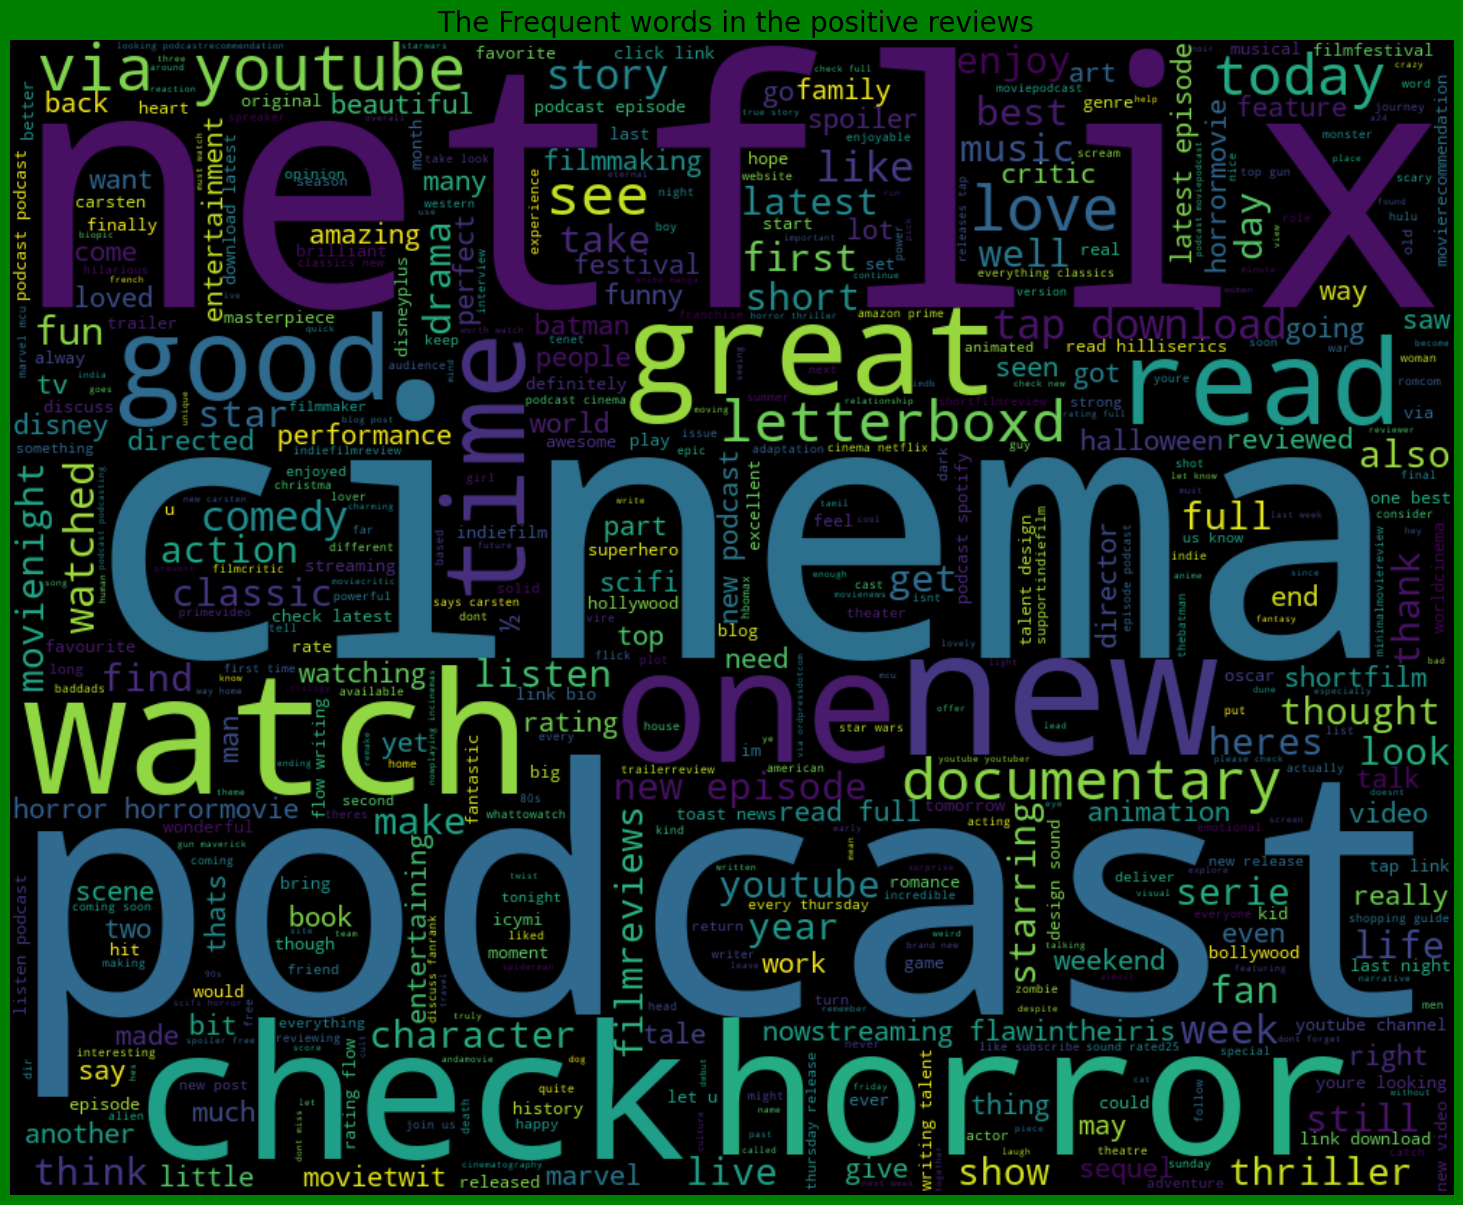

In [78]:
#Plotting the word cloud
text= ' '.join([word for word in pos_tweet_review['Text']])
restricted = ['movie','review','moviereview','filmreview','film','moviereviews','films','reviews','movies','filmtwitter']

plt.figure(figsize=(20,15), facecolor= 'green')
wordcloud= WordCloud(stopwords = restricted, max_words = 500, width = 1000, height= 800).generate(text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title(" The Frequent words in the positive reviews", fontsize= 20)
plt.show()

In [75]:
#Printing word cloud for negative reviews
neg_tweet_review= df_tweet[df_tweet.label==0]
neg_tweet_review.head()

Text  label  Analysis
1  mark hamill still bitter star wars sequels did...      0  Negative
2  mandalorian star teases gideons big plans empi...      0  Negative
3  hello movie lovers announcement two witches bl...      0  Negative
6  attack titan getting stage musical adaptation ...      0  Negative
8  musical comedy penelope development disney gtg...      0  Negative

In [77]:
#Plotting the word cloud
text= ' '.join([word for word in neg_tweet_review['Text']])
restricted = ['movie','review','moviereview','filmreview','film','moviereviews','films','reviews','movies','filmtwitter']

plt.figure(figsize=(20,15), facecolor= 'red')
wordcloud= WordCloud(stopwords = restricted, max_words = 500, width = 1000, height= 800).generate(text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title(" The Frequent words in the negtive reviews", fontsize= 20)
plt.show()

# Pickling the model to be used in flask app

In [50]:
import pickle

pickle.dump(text_process, open('clean.sav', 'wb'))
# pickling the vectorizer
pickle.dump(vect, open('vectorizer.sav', 'wb'))
# pickling the model
pickle.dump(classifier_linear, open('classifier.sav', 'wb'))

print('Both vectorizer and classifier has been pickled. Check "classifier_flask" to load and use in flask app')

Both vectorizer and classifier has been pickled. Check "classifier_flask" to load and use in flask app
